# <center>Metric Learning

Задачи **Metric Learning** основаны на измерении расстояния между объектами выборки. Такие задачи могут и не иметь явной и однозначной целевой метки, поэтому Metric Learning может использоваться как при обучении с учителем (supervised learning), так и без него (unsupervised learning).

>Каждый объект выборки можно представить как точку в $n$-мерном пространстве, где $n$ — количество признаков, которые описывают объект. Тогда **расстояние** есть некоторая мера дистанции между объектами в $n$-мерном пространстве (расстояние между $n$-мерными векторами, описывающими объекты). 

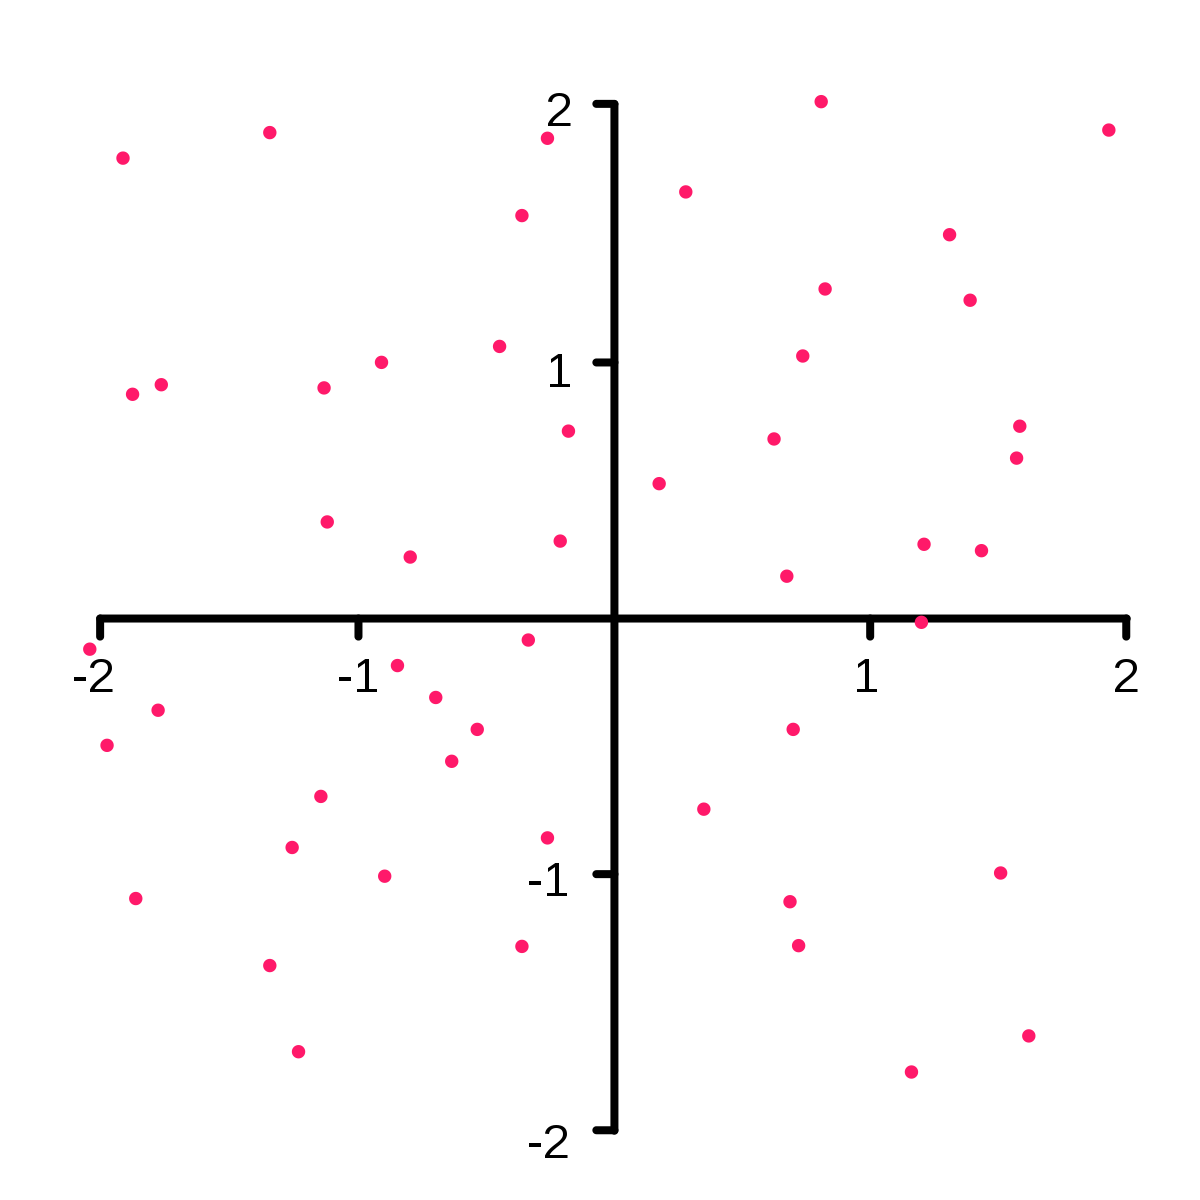
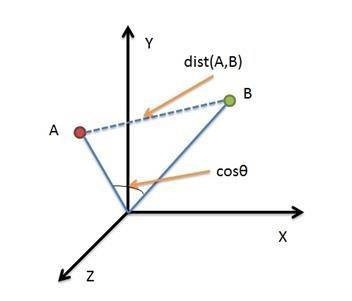

>В данных задачах используется **расстояние Махаланобиса**, обозначаемое далее в формуле как $D$, между объектами $x$ и $x'$  — объектами выборки, описываемыми признаковым пространством (на практике это будут две строки в датасете длиной, равной количеству признаков), вводимое как:

$$ D(x, x') = \sqrt{(Lx - Lx')^T(Lx - Lx')} $$
где $L$ — матрица преобразования пространства, например понижение размерности.  
Самое простое преобразование пространства, известное ещё со школы — это поворот вокруг одной из осей в трехмерном пространстве на угол $\alpha$. 

В матричном виде преобразование для каждого вектора данного пространства $x$ в повернутый на угол новый вектор $x'$ имеет вид: $x' = Mx$, 
где в скалярном виде вектор имеет вид $x=[x_x, x_y, x_z]$, а матрица поворота вокруг оси $z$ имеет вид:
$$ 
M_z(\alpha) = 
\begin{pmatrix}
    \cos{\alpha} & -\sin{\alpha} & 0 \\
    \sin{\alpha} & \cos{\alpha} & 0 \\
    0 & 0 & 1
\end{pmatrix}
$$
Размерность матрицы $L$ равна $(m,n)$, где $m$ — размерность преобразованного пространства, $n$ — количество признаков. В случае уменьшения размерности справедливо следующее неравенство: $m < n$

В частном случае, когда $L$ представляет единичную матрицу, то есть изменений пространства нет и используется для расчета исходное, то такое расстояние является **Евклидовым расстоянием**. Из свойства единичной матрицы имеем для векторного вида евклидового расстояния:
$$ Lx = xL = x \to D = \sqrt{(x-x')^T(x-x')} $$
В скалярном виде:
$$ D = \sqrt{\sum^n_i|x_i-x'_i|^2} $$

Единичной матрицей размера $n$ называют квадратную матрицу $(n,n)$, у которой ненулевые  элементы лежат на главной диагонали и равны единице. Главная диагональ — диагональ матрицы, проведённая из верхнего левого в нижний правый угол.

## Альтернативные метрики

**Расстояние Миньковского** обозначим как $Dm$:

$$ Dm(x,x') = (\sum^n_i |x_i - x'_i|^p)^{\frac{1}{p}} $$
где $p$ - некоторый параметр $(p>1)$.

При $p \to \infty $ расстояние Миньковского превращается в **расстояние Чебышева**:
$$ Dm(x,x')_{p \to \infty} = \max_i |x_i-x'_i| $$

При $p=1$ — **расстояние Манхэттена** или L1-расстояние:
$$ Dm(x,x')_{p=1} = \sum^n_i |x_i-x'i| $$

При $p=2$ — **Евклидово расстояние**, L2-расстояние:
$$ Dm(x,x')_{p=2} = \sqrt{\sum^n_i |x_i - x'_i|^2} $$

**Косинусоидальное расстояние** (далее обозначено как $cosdist$) — расстояние между векторами $u$ и $v$, описывающими объекты выборки $x$ и $x'$.
$$ cosdist(u,v) = 1 - \frac{uv}{||u||_2||v||_2} $$
Евклидова норма $n$-мерного вектора:
$$ ||x||_2 = \sqrt{\sum^n_i|x_i|^2} $$


## <center>Метод ближайших соседей. Кластеризация
>Задача **поиска ближайших соседей (k Nearest Neighbours, kNN)** очень схожа с задачей кластеризации. Основное отличие заключается в том, что кластеризация — задача разбиения на кластеры, с последующим описанием и интерпретацией общих черт кластера. В свою очередь, поиск ближайших соседей состоит в определении уже существующего кластера, к которому относится объект. 

Другими словами, поиск ближайших соседей используется для задачи обучения с учителем, где целевые метки предварительно могут быть получены, например, кластеризацией. 

Задачи обучения с учителем, где целевые метки получены в результате кластеризации, называются **слабым обучением с учителем (weak supervised learning)**. 

### Алгоритм kNN
* Зададим $k$ — количество ближайших соседей, по которым принимается решение.
* Выберем расстояние, по которому будут определяться соседи. Обычно это евклидово расстояние, рассмотренное ранее.
* Обучим модель на признаковом пространстве.  
    Обучение алгоритма kNN заключается в получении пар *признаковое пространство-целевая метка*. Далее данные нормализуются с использованием `MinMaxScaler()`.
* Получим предсказание модели.

>В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.
>
>Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается **среднее по ближайшим соседям**. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.
>
>Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 



## <center>Снижение размерности
Снижение размерности также является основной задачей Metric Learning. Её суть заключается в снижении размерности признакового пространства с сохранением информативности для дальнейшей работы с уменьшенным признаковым пространством в различных задачах, например задачах классификации или кластеризации. Чаще всего это требуется для задач, в которых ограничены ресурсы, например для вычисления моделей на мобильных устройствах, а также для большей интерпретируемости результатов модели. 

Основным методом снижения размерности в задачах кластеризации является **PCA (principal component analysis, метод главных компонент)**